Survived
0    549
1    340
Name: count, dtype: int64
Survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64


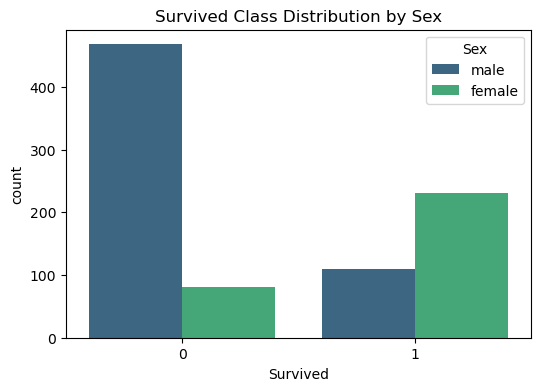

Accuracy: 79.78%


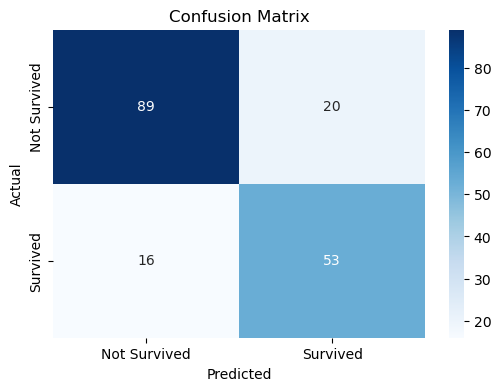

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로딩
df=pd.read_csv("C:\\Users\\LG\\Downloads\\titanic.csv", index_col=0)

# 2. 결측치 확인 및 처리
df.isnull().sum()
df['Age']=df['Age'].fillna(df['Age'].mean())
df.dropna(subset=['Embarked'],inplace=True)

# 3. 레이블 분포 확인 (Imbalanced Data 확인)
print(df['Survived'].value_counts())  # Survived 컬럼의 클래스 분포 확인
print(df['Survived'].value_counts(normalize=True))  # 클래스 비율 확인

# Survived 컬럼의 클래스 분포 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=df, palette='viridis')  # hue='Sex' 추가
plt.title('Survived Class Distribution by Sex')
plt.show()

# 4. 필요없는 컬럼 제거
df=df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# 5. 인코딩
label_encoder=LabelEncoder()
df['Sex']=label_encoder.fit_transform(df['Sex'])

# 6. 특성과 목표 변수 설정
X=df.drop('Survived',axis=1)
y=df['Survived']

# 7. 데이터 분할
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 8. SVM 모델 학습
svm_model=SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 9. 예측
y_pred=svm_model.predict(X_test)

# 10. 정확도 확인
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 11. 혼동변수 확인
conf_matrix=confusion_matrix(y_test, y_pred)

# 12. 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()